In [2]:
import pickle
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
x = np.zeros((50,100))
x_test = np.zeros((150,100))

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        x[i,j] = np.random.normal(0,1,1)
        

for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]):
        x_test[i,j] = np.random.normal(0,1,1)

noise = np.random.normal(0, 1/25, x.shape[0])

noise_test = np.random.normal(0, 1/25, x_test.shape[0])

beta = np.random.normal(0,1,x.shape[1])

beta = abs(beta)

beta = (beta/np.sqrt(np.sum(beta**2)))

beta = np.transpose(beta)

y = np.matmul(x,beta) + noise
y = y.reshape((y.size,1))

print(beta.shape)
print(x_test.shape)
y_test = np.matmul(x_test,beta) + noise_test

y_test = y_test.reshape((y_test.size,1))
print(y_test.shape)


(100,)
(150, 100)
(150, 1)


## Graphing the Risk Curve for HSU which is the theorem 1 curve under the selection of uniformly random features that are selected

In [61]:
risk_curve = np.zeros(4000)
for i in range(4000):
    if(i <= x.shape[0] - 2):
        risk_curve[i] = ()
    

## Getting the actual accuracy using the random selection of features and fitting a linear regression model using those features

This is the counter 1
This is the test accuracy using 1 uniformly distributed 0.8044927648410589
This is the counter 2
This is the test accuracy using 2 uniformly distributed 0.8197521803639646
This is the counter 3
This is the test accuracy using 3 uniformly distributed 0.9094457686308158
This is the counter 4
This is the test accuracy using 4 uniformly distributed 0.8269509130774783
This is the counter 5
This is the test accuracy using 5 uniformly distributed 0.9183759437016439
This is the counter 6
This is the test accuracy using 6 uniformly distributed 0.8796325580195433
This is the counter 7
This is the test accuracy using 7 uniformly distributed 1.2067063679160768
This is the counter 8
This is the test accuracy using 8 uniformly distributed 0.843170986818141
This is the counter 9
This is the test accuracy using 9 uniformly distributed 1.019051314195865
This is the counter 10
This is the test accuracy using 10 uniformly distributed 1.077790017811369
This is the counter 11
This is 

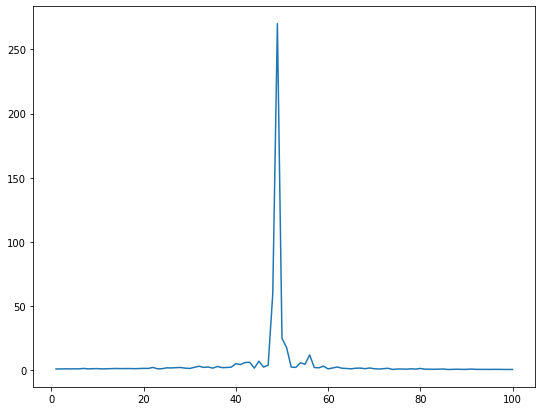

In [24]:
test_accuracy  = np.zeros(x.shape[1])

for j in range(1,x.shape[1] + 1):
    
    # selecting the random features
    unif_list = np.random.choice(x.shape[1],size = j,replace = False)
    unif_list.sort()
    temp_x = x[:,unif_list]

    # fitting the model with the randomly selected features
    lm = LinearRegression().fit(temp_x,y)
    
    # getting the coefficient of the lm model
    beta_temp = lm.coef_
    beta_temp = beta_temp.reshape(beta_temp.size,1)
#     beta_temp = beta_temp.astype(float)
    
    beta = np.zeros((x.shape[1],1))
    counter = 0
    for i in range(x.shape[1]):
        if(i in unif_list):
            beta[i] = beta_temp[counter]
            counter+= 1
        else:
            beta[i] = 0
    
    print("This is the counter " + str(counter))
    pred = np.matmul(x_test,beta)
    pred = pred.reshape(pred.size,1)
    
    test_accuracy[j-1] = mean_squared_error(pred,y_test)
    
    print("This is the test accuracy using " + str(j) + " uniformly distributed "  + str(test_accuracy[j-1]))

    
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1],x.shape[1]), y = (test_accuracy))
plt.show()
    